<a href="https://colab.research.google.com/github/DenZhid/DeepLearningLabs/blob/master/lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Начальная настройка и входные данные**

**Необходимые импорты**

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM, GRU
from keras.models import Model

import numpy as np

import matplotlib.pyplot as plt

import csv
import os

**Массивы данных**

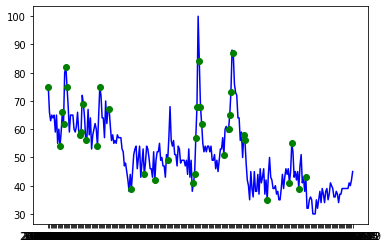

In [87]:
if not os.path.exists('kirkorov_search_trend_2015_2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/kirkorov_search_trend_2015_2020.csv

if not os.path.exists('neural_networks_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/neural_networks_trend_2015-2020.csv

if not os.path.exists('videocards_search_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/videocards_search_trend_2015-2020.csv

dates = []
values = []
with open('videocards_search_trend_2015-2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates.append(data[0])
    values.append(int(data[1]))
X_train = []
X_train.append([values[0], values[0], values[0]])
X_train.append([values[1], values[0], values[0]])
X_train.append([values[2], values[1], values[0]])
X_train.append([values[3], values[2], values[0]])
for i in range(4, len(values)):
  X_train.append([values[i], values[i-1], values[i-4]])

Y_train = []
if (values[0] - values[2] >= 10 or values[0] - values[2] <= -10): 
  Y_train.append(1)
for i in range(1, len(values)-2):
  if (values[i] - values[i+2] >= 10 and values[i-1] - values[i] >= -10
      or values[i] - values[i+2] <= -10 and values[i-1] - values[i] <= 10):
    Y_train.append(1)
  else:
    Y_train.append(0)
Y_train.append(0)
Y_train.append(0)
plt.plot(dates, values, 'blue')
for i in range(0, len(Y_train)):
  if (Y_train[i] == 1):
    plt.plot(dates[i], values[i], 'go')

X_train = array(X_train).reshape(len(X_train), 3, 1)
Y_train = array(Y_train)

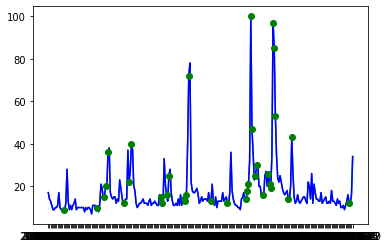

In [94]:
dates_1 = []
values_1 = []
with open('kirkorov_search_trend_2015_2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates_1.append(data[0])
    values_1.append(int(data[1]))
  plt.plot(dates_1, values_1)
X_test_1 = []
X_test_1.append([values_1[0], values_1[0], values_1[0]])
X_test_1.append([values_1[1], values_1[0], values_1[0]])
X_test_1.append([values_1[2], values_1[1], values_1[0]])
X_test_1.append([values_1[3], values_1[2], values_1[0]])
for i in range(4, len(values_1)):
  X_test_1.append([values_1[i], values_1[i-1], values_1[i-4]])

Y_test_1 = []
if (values_1[0] - values_1[2] >= 10 or values_1[0] - values_1[2] <= -10): 
  Y_test_1.append(1)
for i in range(1, len(values_1)-2):
  if (values_1[i] - values_1[i+2] >= 10 and values_1[i-1] - values_1[i] >= -10
      or values_1[i] - values_1[i+2] <= -10 and values_1[i-1] - values_1[i] <= 10):
    Y_test_1.append(1)
  else:
    Y_test_1.append(0)
Y_test_1.append(0)
Y_test_1.append(0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(Y_test_1)):
  if (Y_test_1[i] == 1):
    plt.plot(dates_1[i], values_1[i], 'go')

X_test_1 = array(X_test_1).reshape(len(X_test_1), 3, 1)
Y_test_1 = array(Y_test_1)

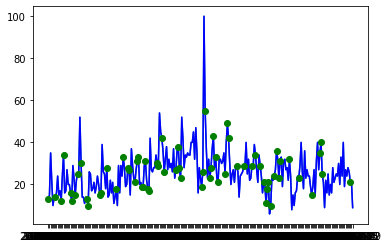

In [95]:
dates_2 = []
values_2 = []
with open('neural_networks_trend_2015-2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates_2.append(data[0])
    values_2.append(int(data[1]))
  plt.plot(dates_2, values_2)
X_test_2 = []
X_test_2.append([values_2[0], values_2[0], values_2[0]])
X_test_2.append([values_2[1], values_2[0], values_2[0]])
X_test_2.append([values_2[2], values_2[1], values_2[0]])
X_test_2.append([values_2[3], values_2[2], values_2[0]])
for i in range(4, len(values_2)):
  X_test_2.append([values_2[i], values_2[i-1], values_2[i-4]])

Y_test_2 = []
if (values_2[0] - values_2[2] >= 10 or values_2[0] - values_2[2] <= -10): 
  Y_test_2.append(1)
for i in range(1, len(values_2)-2):
  if (values_2[i] - values_2[i+2] >= 10 and values_2[i-1] - values_2[i] >= -10
      or values_2[i] - values_2[i+2] <= -10 and values_2[i-1] - values_2[i] <= 10):
    Y_test_2.append(1)
  else:
    Y_test_2.append(0)
Y_test_2.append(0)
Y_test_2.append(0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(Y_test_2)):
  if (Y_test_2[i] == 1):
    plt.plot(dates_2[i], values_2[i], 'go')

X_test_2 = array(X_test_2).reshape(len(X_test_2), 3, 1)
Y_test_2 = array(Y_test_2)

# **Имплементация GRU нейронной сети**


**Обучение нейронной сети**

In [90]:
model_GRU = Sequential()
model_GRU.add(GRU(50, activation='relu', input_shape=(3, 1)))
model_GRU.add(Dense(1))
model_GRU.compile(optimizer='adam', loss='mse')

history_GRU = model_GRU.fit(X_train, Y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
7/7 [==============================] - 2s 48ms/step - loss: 1.5006 - val_loss: 0.0851
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.9088 - val_loss: 0.4439
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4656 - val_loss: 0.9453
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.3545 - val_loss: 0.1151
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.3145 - val_loss: 0.0924
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1938 - val_loss: 0.1538
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1663 - val_loss: 0.0681
Epoch 8/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1468 - val_loss: 0.0603
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1459 - val_loss: 0.0676
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1407 - val_loss: 0.0583
Epoch 11/1000
7/7 

**Проверка на других данных**

0.85


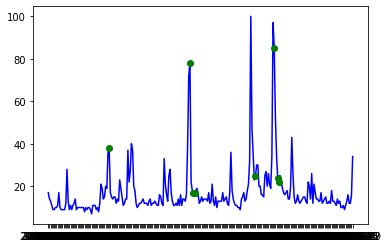

In [96]:
test_output = model_GRU.predict(X_test_1, verbose=0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_1[i], values_1[i], 'go')
right_results = 0
all_results = 0
for i in range(0, len(Y_test_1)):
  all_results += 1
  if (Y_test_1[i] == 1 and test_output[i] > 0.5):
      right_results += 1
  if (Y_test_1[i] == 0 and test_output[i] <= 0.5):
      right_results += 1
print(right_results / all_results)

0.7318007662835249


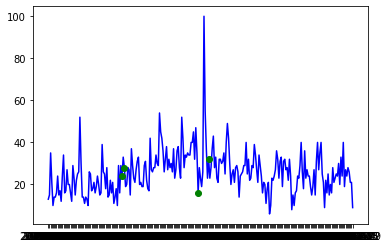

In [97]:
test_output = model_GRU.predict(X_test_2, verbose=0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_2[i], values_2[i], 'go')
right_results = 0
all_results = 0
for i in range(0, len(Y_test_2)):
  all_results += 1
  if (Y_test_2[i] == 1 and test_output[i] > 0.5):
      right_results += 1
  if (Y_test_2[i] == 0 and test_output[i] <= 0.5):
            right_results += 1
print(right_results / all_results)

# **Имплементация LSTM нейронной сети**

**Обучение нейронной сети**

In [93]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mse')

history_LSTM = model_LSTM.fit(X_train, Y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
7/7 [==============================] - 2s 44ms/step - loss: 2.7632 - val_loss: 0.0910
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.5052 - val_loss: 0.6763
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4348 - val_loss: 0.1043
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.1755 - val_loss: 0.0512
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1943 - val_loss: 0.0581
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1275 - val_loss: 0.1029
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1418 - val_loss: 0.0864
Epoch 8/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1235 - val_loss: 0.0563
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1248 - val_loss: 0.0537
Epoch 10/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1215 - val_loss: 0.0609
Epoch 11/1000
7/7

**Проверка на других данных**

0.7461538461538462


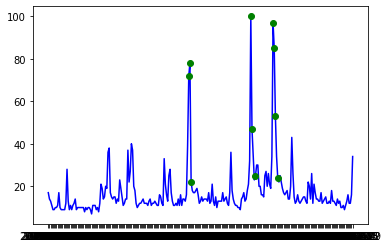

In [98]:
test_output = model_LSTM.predict(X_test_1, verbose=0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_1[i], values_1[i], 'go')
right_results = 0
all_results = 0
for i in range(0, len(Y_test_1)):
  all_results += 1
  if (Y_test_1[i] == 1 and test_output[i] > 0.5):
    right_results += 1
  if (Y_test_2[i] == 0 and test_output[i] <= 0.5):
    right_results += 1
print(right_results / all_results)

0.7471264367816092


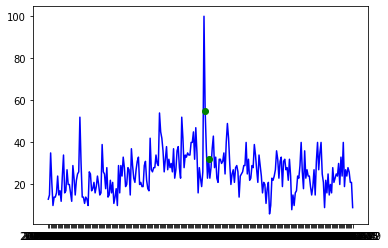

In [99]:
test_output = model_LSTM.predict(X_test_2, verbose=0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_2[i], values_2[i], 'go')
right_results = 0
all_results = 0
for i in range(0, len(Y_test_2)):
  all_results += 1
  if (Y_test_2[i] == 1 and test_output[i] > 0.5):
    right_results += 1
  if (Y_test_2[i] == 0 and test_output[i] <= 0.5):
    right_results += 1
print(right_results / all_results)